In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Generating synthetic data for demonstration

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [3]:
X

array([[-0.87292898,  0.013042  ],
       [ 1.31293463,  2.77053357],
       [ 2.34042818,  2.42099601],
       [ 2.29454774, -0.40438019],
       [ 0.94410516,  0.4772409 ],
       [-0.11959689,  0.50891314],
       [ 0.1510847 ,  0.81007677],
       [-0.00745441, -0.45284256],
       [-1.25396925,  0.06769236],
       [-0.24392415,  1.19979806],
       [-1.9208928 ,  2.9189499 ],
       [ 0.48806269,  3.50578584],
       [ 2.25751204,  1.81515089],
       [-3.12190908,  0.62220145],
       [ 1.87768113,  0.51095984],
       [ 0.46785542,  0.7871928 ],
       [ 0.48404809,  0.04843842],
       [-0.54235518,  3.49536942],
       [ 1.04235818,  1.10204918],
       [ 1.63367133,  0.59219328],
       [ 1.85756778,  1.7382647 ],
       [-2.41167954, -0.80620914],
       [ 0.87481918,  0.48815664],
       [ 0.09529002,  0.57526555],
       [-1.64994223, -0.06695917],
       [-0.65245349, -0.19158949],
       [ 2.10252081,  2.34684404],
       [ 2.9574463 ,  2.01418031],
       [-1.70056309,

In [4]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

### Training the Logistic Regression model

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the logistic regression model
model = LogisticRegression(C= 0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.875

### Plotting before and after applying Logistic Regression 

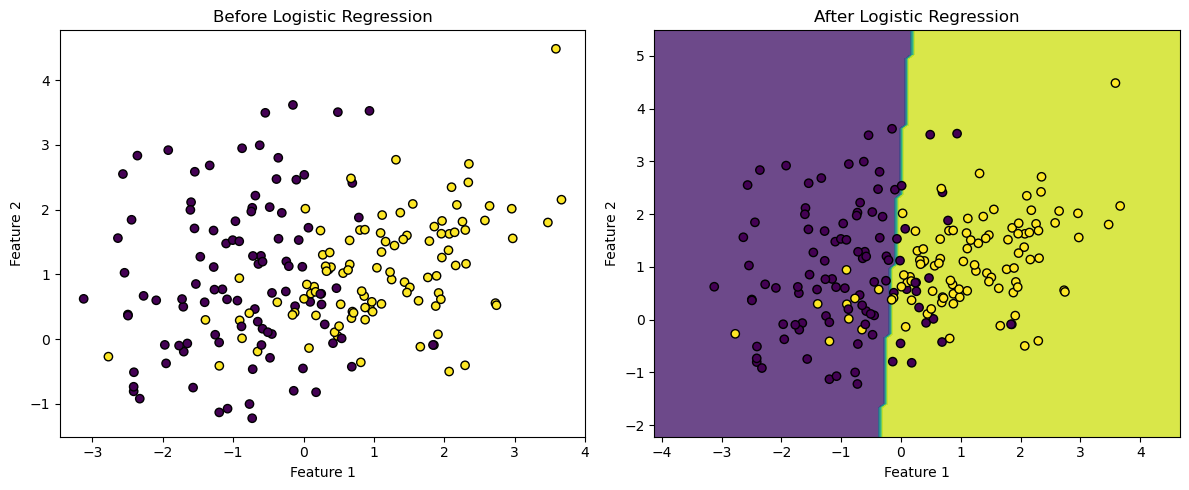

In [6]:
# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting before and after applying logistic regression
plt.figure(figsize=(12, 5))

# Plotting the scatter plot of the original data (before logistic regression)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before Logistic Regression')

# Plotting the decision boundary obtained from logistic regression
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('After Logistic Regression')

plt.tight_layout()
plt.show()

### Hyper-parameter Tuning of model 

In [7]:
# Define hyperparameters for tuning

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [8]:
# Create logistic regression model
logistic = LogisticRegression()

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Create a new model with the best hyperparameters
best_model = LogisticRegression(C=0.01, solver='saga')  # Example: Set C=0.01 for stronger regularization
best_model.fit(X_train, y_train)

# Accuracy of the best model
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy of the best model on test set: {accuracy:.2f}")

Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Accuracy of the best model on test set: 0.88


### Plotting before and after Logistic Regression 

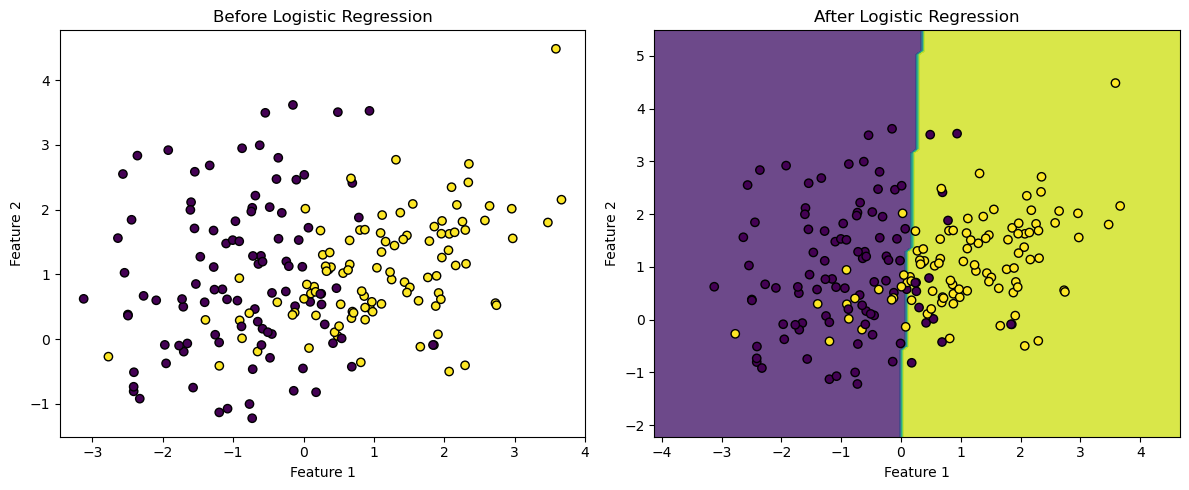

In [9]:
plt.figure(figsize=(12, 5))

# Plotting the scatter plot of the original data (before logistic regression)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before Logistic Regression')

# Plotting the decision boundary obtained from logistic regression
plt.subplot(1, 2, 2)
# Fit the best model on the entire dataset for decision boundary plotting
best_model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('After Logistic Regression')

plt.tight_layout()
plt.show()